In [1]:
import pandas as pd
import numpy as np
from modules.data_samples import get_data
from modules.data_cleaning import data_cleaning_reviews
from modules.utility_functions import create_wordcloud
from modules.data_cleaning import data_cleaning_books
import random
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid', context='talk')

[nltk_data] Downloading package stopwords to /Users/hugo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/hugo/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Get data sample

In [2]:
df_books_sample,df_book_authors,df_book_reviews, df_book_genres  = get_data()

### Save samples to CSV for better handling

In [3]:
df_books_sample.to_csv('../data/sample_data/books_sample.csv', index=False)
df_book_authors.to_csv('../data/sample_data/authors_sample.csv', index=False)
df_book_reviews.to_csv('../data/sample_data/reviews_sample.csv', index=False)
df_book_genres.to_csv('../data/sample_data/genres_sample.csv', index=False)

### Get data sample for processing

In [4]:
df_books_sample   = pd.read_csv('../data/sample_data/books_sample.csv')

In [5]:
df_authors_sample = pd.read_csv('../data/sample_data/authors_sample.csv')

In [6]:
df_reviews_sample = pd.read_csv('../data/sample_data/reviews_sample.csv')

In [7]:
df_genres_sample = pd.read_csv('../data/sample_data/genres_sample.csv')

#### Data exploration and cleaning

In [8]:
df_books_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23382 entries, 0 to 23381
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   text_reviews_count    23382 non-null  int64  
 1   country_code          23382 non-null  object 
 2   language_code         13621 non-null  object 
 3   average_rating        23382 non-null  float64
 4   description           23382 non-null  object 
 5   num_pages             23382 non-null  int64  
 6   publication_year      23382 non-null  int64  
 7   image_url             23382 non-null  object 
 8   book_id               23382 non-null  int64  
 9   ratings_count         23382 non-null  int64  
 10  title                 23382 non-null  object 
 11  title_without_series  23382 non-null  object 
 12  author                23382 non-null  int64  
 13  name                  23382 non-null  object 
dtypes: float64(1), int64(6), object(7)
memory usage: 2.5+ MB


In [10]:
df_books_sample.head()

,text_reviews_count,country_code,language_code,average_rating,description,num_pages,publication_year,image_url,book_id,ratings_count,title,title_without_series,author,name
0,27,US,NaN,3.33,A love story about a girl who comes back from ...,208,2015,https://images.gr-assets.com/books/1415581655m...,22965343,52,Who Is Mackie Spence?,Who Is Mackie Spence?,8456833,Lin Kaymer
1,10,US,NaN,3.83,Military service was once taken for granted as...,256,2006,https://s.gr-assets.com/assets/nophoto/book/11...,80118,72,AWOL: The Unexcused Absence of America's Upper...,AWOL: The Unexcused Absence of America's Upper...,45600,Kathy Roth-Douquet
2,61,US,eng,3.95,"Raenef is the black sheep of the demon court, ...",192,2003,https://images.gr-assets.com/books/1288648957m...,29497,4399,"Demon Diary, Volume 01","Demon Diary, Volume 01",16589,Kara
3,207,US,eng,4.02,"Set in South Carolina in 1964, The Secret Life...",333,2003,https://images.gr-assets.com/books/1444392146m...,6081433,3607,The Secret Life of Bees,The Secret Life of Bees,4711,Sue Monk Kidd
4,6,US,NaN,4.09,Cathy Cramer is a former lawyer and investigat...,305,2013,https://images.gr-assets.com/books/1356054466m...,16182612,47,Truth Stained Lies,Truth Stained Lies,19811,Terri Blackstock


In [11]:
#Remove unnecesary columns
df_books_sample.drop(columns=['language_code','country_code'], inplace= True)
df_books_sample.shape


(23382, 12)

In [12]:
df_books_sample.isnull().sum()

text_reviews_count      0
average_rating          0
description             0
num_pages               0
publication_year        0
image_url               0
book_id                 0
ratings_count           0
title                   0
title_without_series    0
author                  0
name                    0
dtype: int64

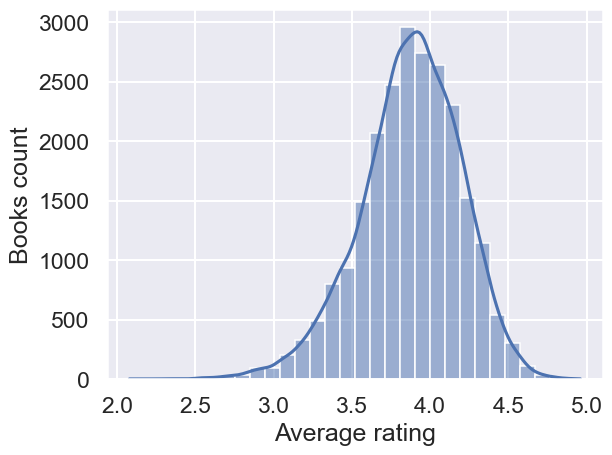

In [13]:
#Review books raiting
ax = sns.histplot(df_books_sample["average_rating"].astype(float),
            bins= 30,
            kde= True)
ax.set(xlabel='Average rating', ylabel='Books count')
plt.show()

In [13]:
#df_books_sample["text_reviews_count"].value_counts().head(60).plot(kind='barh', figsize=(10,15))
#sns.countplot(y="text_reviews_count", data=df_books_sample)

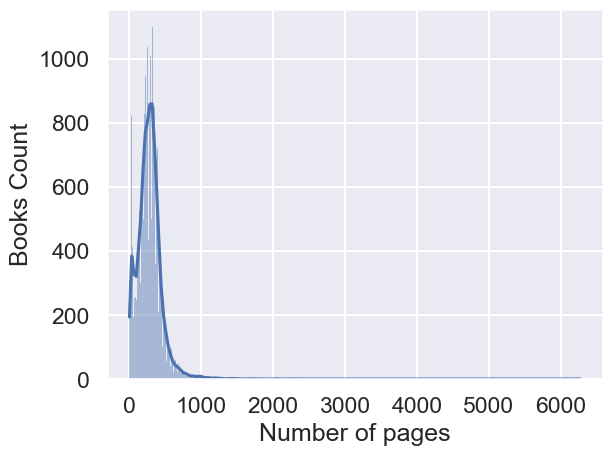

In [14]:
#Review pages distribution
ax = sns.histplot(df_books_sample["num_pages"].astype(float),
            #bins= 30,
            kde= True)
ax.set(xlabel='Number of pages', ylabel='Books Count')
plt.show()

In [15]:
#Check if books have values with 0
df_books_sample.isin([0]).sum(axis=0)

text_reviews_count       0
average_rating           0
description              0
num_pages               72
publication_year         0
image_url                0
book_id                  0
ratings_count            0
title                    0
title_without_series     0
author                   0
name                     0
dtype: int64

In [16]:
#Replace pages with value 0 with the median
pages_median = df_books_sample['num_pages'].replace(0,pd.NA).median()

In [17]:
df_books_sample["num_pages"] = df_books_sample["num_pages"].replace(0,pages_median)

In [19]:
df_books_sample.isin([0]).sum(axis=0)

text_reviews_count      0
average_rating          0
description             0
num_pages               0
publication_year        0
image_url               0
book_id                 0
ratings_count           0
title                   0
title_without_series    0
author                  0
name                    0
dtype: int64

In [20]:
df_books_sample = data_cleaning_books(df_books_sample)

In [21]:
df_books_sample.head()

,text_reviews_count,average_rating,description,num_pages,publication_year,image_url,book_id,ratings_count,title,title_without_series,author,name,description_text_clean
0,27,3.33,A love story about a girl who comes back from ...,208,2015,https://images.gr-assets.com/books/1415581655m...,22965343,52,Who Is Mackie Spence?,Who Is Mackie Spence?,8456833,Lin Kaymer,"[love, story, girl, come, back, neardeath, exp..."
1,10,3.83,Military service was once taken for granted as...,256,2006,https://s.gr-assets.com/assets/nophoto/book/11...,80118,72,AWOL: The Unexcused Absence of America's Upper...,AWOL: The Unexcused Absence of America's Upper...,45600,Kathy Roth-Douquet,"[military, service, taken, granted, natural, p..."
2,61,3.95,"Raenef is the black sheep of the demon court, ...",192,2003,https://images.gr-assets.com/books/1288648957m...,29497,4399,"Demon Diary, Volume 01","Demon Diary, Volume 01",16589,Kara,"[raenef, black, sheep, demon, court, minimal, ..."
3,207,4.02,"Set in South Carolina in 1964, The Secret Life...",333,2003,https://images.gr-assets.com/books/1444392146m...,6081433,3607,The Secret Life of Bees,The Secret Life of Bees,4711,Sue Monk Kidd,"[set, south, carolina, secret, life, beestells..."
4,6,4.09,Cathy Cramer is a former lawyer and investigat...,305,2013,https://images.gr-assets.com/books/1356054466m...,16182612,47,Truth Stained Lies,Truth Stained Lies,19811,Terri Blackstock,"[cathy, cramer, former, lawyer, investigative,..."


In [22]:
df_authors_sample.isnull().sum()

author_id    0
name         0
dtype: int64

In [23]:
authors_group = df_books_sample.groupby('name', as_index=False)['book_id'].count().sort_values(by='book_id', ascending=False).head(10)


In [24]:
authors_group

,name,book_id
196,Agatha Christie,54
6324,James Patterson,49
14330,Stephen King,42
4860,Francine Pascal,37
15864,William Shakespeare,36
11616,Nora Roberts,31
14930,Terry Pratchett,28
2043,C.S. Lewis,26
1113,Anonymous,23
11422,Neil Gaiman,23


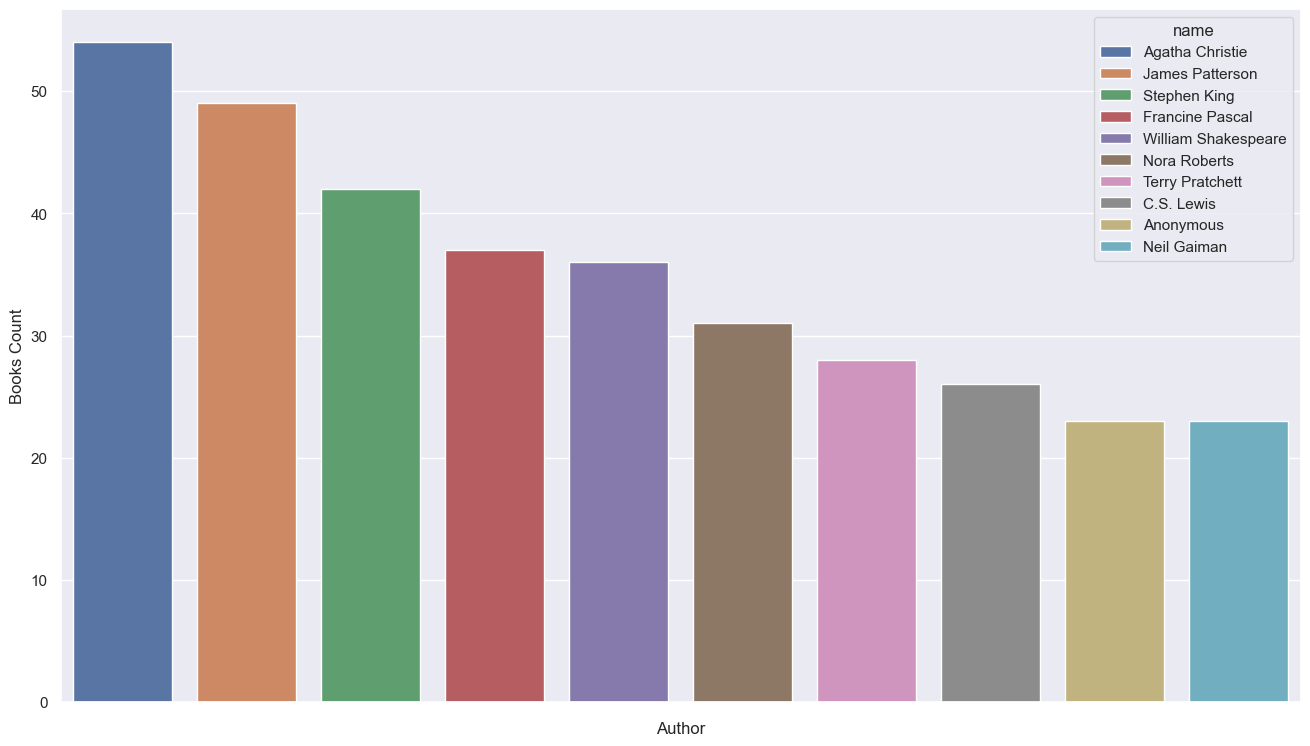

In [25]:
#Top 10 authors in the dataset sample
ax = sns.set(rc={'figure.figsize':(16,9)})


sns.barplot(data= authors_group, x='name', y='book_id', hue='name', dodge=False).set(xticklabels=[],xlabel='Author', ylabel='Books Count');
plt.show()

In [26]:
df_reviews_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523874 entries, 0 to 523873
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       523874 non-null  object
 1   book_id       523874 non-null  int64 
 2   review_id     523874 non-null  object
 3   rating        523874 non-null  int64 
 4   review_text   523669 non-null  object
 5   date_added    523874 non-null  object
 6   date_updated  523874 non-null  object
 7   read_at       435137 non-null  object
 8   started_at    307493 non-null  object
 9   n_votes       523874 non-null  int64 
 10  n_comments    523874 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 44.0+ MB


In [27]:
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,20873740,ef77b0cd7d5db0a85aa64f291d63d450,5,"I haven't read a ton of ""history of the world""...",Tue May 17 20:59:38 -0700 2016,Tue May 17 20:59:38 -0700 2016,Sat Aug 13 00:00:00 -0700 2016,Fri Jul 01 00:00:00 -0700 2016,68,5
1,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4,Fun sequel to the original.,Tue Nov 17 11:37:35 -0800 2015,Tue Nov 17 11:38:05 -0800 2015,NaN,NaN,7,0
2,8842281e1d1347389f2ab93d60773d4d,12953520,8666dfd554e310084c4bc72b2d357f3d,4,A hilarious romp through the known and unknown...,Tue Jul 10 20:26:21 -0700 2012,Wed Sep 12 23:32:04 -0700 2012,Mon Sep 10 00:00:00 -0700 2012,Tue Sep 04 00:00:00 -0700 2012,1,0
3,8842281e1d1347389f2ab93d60773d4d,77430,28007503b429dc6724da7076ae7306b4,5,One of the most enjoyable stories I've read in...,Tue Jan 13 11:12:38 -0800 2009,Wed Mar 22 11:46:19 -0700 2017,Sat May 23 00:00:00 -0700 2009,NaN,5,0
4,8842281e1d1347389f2ab93d60773d4d,1953,70c420b9b26d869a1ef8548b20a9edeb,4,On loan to Diana Sonn,Wed Dec 05 12:25:38 -0800 2007,Wed Mar 22 11:45:51 -0700 2017,NaN,NaN,2,0


In [28]:
df_reviews_sample.shape

(523874, 11)

In [29]:
#Remove unnecesary columns
df_reviews_sample.drop(columns=['date_added','date_updated','read_at','started_at'], inplace= True)
df_reviews_sample.shape

(523874, 7)

In [30]:
df_reviews_sample.head()

,user_id,book_id,review_id,rating,review_text,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,20873740,ef77b0cd7d5db0a85aa64f291d63d450,5,"I haven't read a ton of ""history of the world""...",68,5
1,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4,Fun sequel to the original.,7,0
2,8842281e1d1347389f2ab93d60773d4d,12953520,8666dfd554e310084c4bc72b2d357f3d,4,A hilarious romp through the known and unknown...,1,0
3,8842281e1d1347389f2ab93d60773d4d,77430,28007503b429dc6724da7076ae7306b4,5,One of the most enjoyable stories I've read in...,5,0
4,8842281e1d1347389f2ab93d60773d4d,1953,70c420b9b26d869a1ef8548b20a9edeb,4,On loan to Diana Sonn,2,0


In [31]:
df_reviews_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523874 entries, 0 to 523873
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      523874 non-null  object
 1   book_id      523874 non-null  int64 
 2   review_id    523874 non-null  object
 3   rating       523874 non-null  int64 
 4   review_text  523669 non-null  object
 5   n_votes      523874 non-null  int64 
 6   n_comments   523874 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 28.0+ MB


In [35]:
df_reviews_sample['review_text'] = df_reviews_sample['review_text'].astype(str)

In [36]:
df_reviews_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523874 entries, 0 to 523873
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user_id      523874 non-null  object
 1   book_id      523874 non-null  int64 
 2   review_id    523874 non-null  object
 3   rating       523874 non-null  int64 
 4   review_text  523874 non-null  object
 5   n_votes      523874 non-null  int64 
 6   n_comments   523874 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 28.0+ MB


In [37]:
df_reviews_sample_p = data_cleaning_reviews(df_reviews_sample)

In [38]:
df_reviews_sample_p

,user_id,book_id,review_id,rating,review_text,n_votes,n_comments,review_text_clean
0,8842281e1d1347389f2ab93d60773d4d,20873740,ef77b0cd7d5db0a85aa64f291d63d450,5,"I haven't read a ton of ""history of the world""...",68,5,"[havent, read, ton, history, world, books,, fa..."
1,8842281e1d1347389f2ab93d60773d4d,23310161,f4b4b050f4be00e9283c92a814af2670,4,Fun sequel to the original.,7,0,"[fun, sequel, original.]"
2,8842281e1d1347389f2ab93d60773d4d,12953520,8666dfd554e310084c4bc72b2d357f3d,4,A hilarious romp through the known and unknown...,1,0,"[hilarious, romp, known, unknown, universe, ex..."
3,8842281e1d1347389f2ab93d60773d4d,77430,28007503b429dc6724da7076ae7306b4,5,One of the most enjoyable stories I've read in...,5,0,"[one, enjoyable, story, ive, read, time., capt..."
4,8842281e1d1347389f2ab93d60773d4d,1953,70c420b9b26d869a1ef8548b20a9edeb,4,On loan to Diana Sonn,2,0,"[loan, diana, sonn]"
...,...,...,...,...,...,...,...,...
523869,480ac8b4df39533a6c7fe6ae109aa56a,65112,6251b6332ee9f898fe0e975821eb747e,2,Does not give a satisfying ending to the serie...,0,0,"[give, satisfying, ending, series., disappoint..."
523870,afcd096765a8c354be0706ab1324999b,555999,a4f8b16d5c0c5dc08d0f3fa118a262b4,5,My mother gave me this book as a gift... it's ...,0,0,"[mother, gave, book, gift..., adorable.]"
523871,bd2f9703203bda8e2defdfffc7eb5a10,17262138,9d9c9843ac68b2c5ec877641b3c29baa,4,This is an interesting snapshot of Paris right...,0,0,"[interesting, snapshot, paris, right, time, ro..."
523872,1be08d25e7d8114b3c49a126ed57acdf,13596809,9517373abb3f5933a479cc5032f669d7,5,The author is brilliant. The storyline was wel...,0,0,"[author, brilliant., storyline, well, made, st..."


In [39]:
df_genres_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111704 entries, 0 to 111703
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   book_id  111704 non-null  int64 
 1   genres   111704 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.7+ MB


In [40]:
book_genres_group = df_genres_sample.groupby('genres')['genres'].count().rename_axis('genre_name').reset_index(name='count')

In [41]:
book_genres_group = book_genres_group.sort_values(by='count', ascending= False)

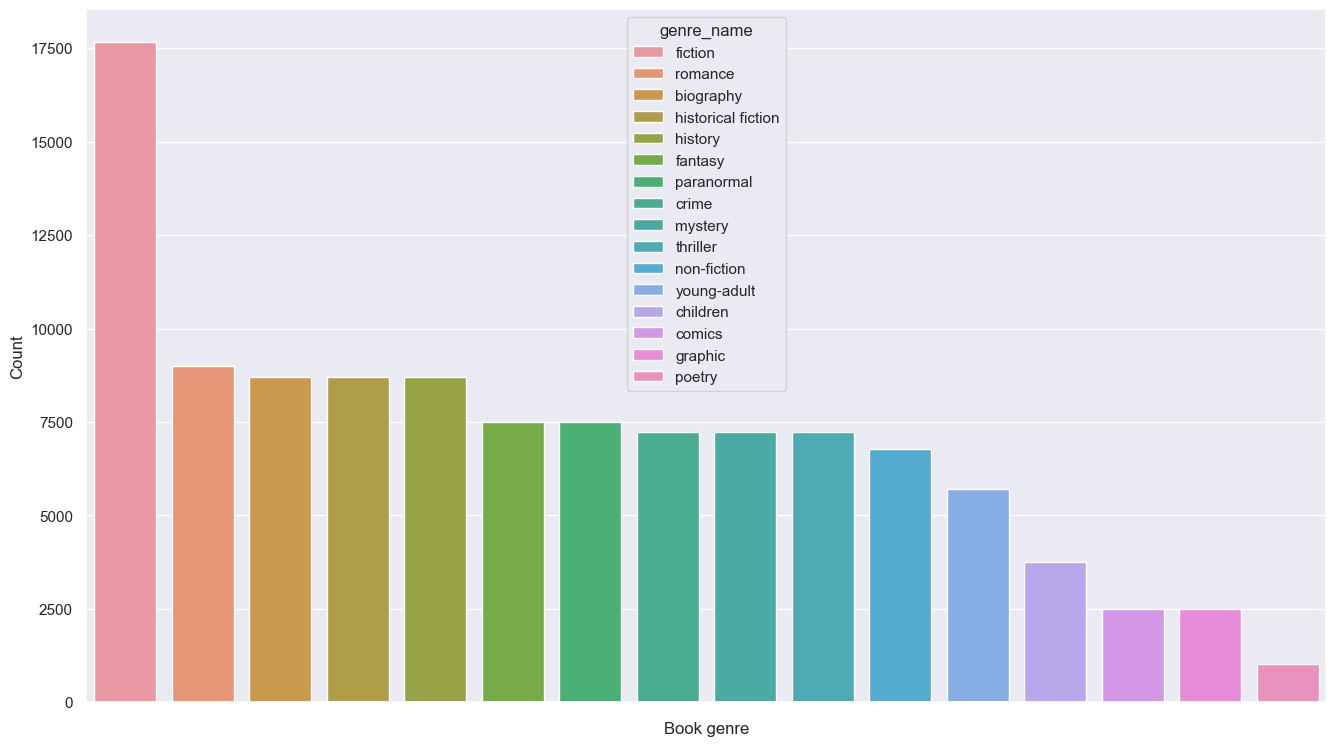

In [42]:
#Book genre and count
ax = sns.set(rc={'figure.figsize':(16,9)})
sns.barplot(data= book_genres_group, x='genre_name', y='count', hue='genre_name', dodge=False).set(xticklabels=[],xlabel='Book genre', ylabel='Count');
plt.show()

In [43]:
df_books_sample.to_csv('../data/sample_data/processed/books_sample.csv', index=False)
df_authors_sample.to_csv('../data/sample_data/processed/authors_sample.csv', index=False)
df_reviews_sample_p.to_csv('../data/sample_data/processed/reviews_sample.csv', index=False)
df_genres_sample.to_csv('../data/sample_data/processed/genres_sample.csv', index=False)

In [27]:
df_books_sample.to_csv('../data/sample_data/processed/books_sample.csv', index=False)
df_reviews_sample_p.to_csv('../data/sample_data/processed/reviews_sample.csv', index=False)